In [3]:
%run init.ipynb
%run init-quantum_gates.ipynb

# Mach-Zender Interferometer

<img src = 'MZI_wbomb.png' width = '50%'>

Adapted from: https://github.com/jonasmaziero/qiskit/blob/main/12_mach_zehnder.ipynb and http://localhost:8888/notebooks/%2B%2BJonas/qiskit/20_elitzur_vaidman_bomb.ipynb

More about: https://arxiv.org/abs/2203.17062

 Before we describe the Elitzur-Vaidman bomb, let's do a brief study of the Mach-Zehnder Interferometer (MZI).

We intend to describe a quanton (more appropriate name for a quantum system - e.g. photon, electron - that manifests dual behavior of particle and wave) entering a Mach-Zehnder interferometer. Let's make this description through a two-level system (one qubit), for that, let's make some definitions. Horizontal movement of the quanton will be denoted by $|0\rangle$ and vertical movement will be denoted by $|1\rangle$.

Thus, the initial state of our system is given by $|\psi_0\rangle = |0\rangle$, as shown in the figure above.

Quanton will pass through some optical devices: BS stands for beam splitter, M is the mirrors, PS stand for phase-shifter and D$_j$ are the detectors in positions $j=0,1$ (horizontal and vertical path respectively).

## Optical devices

Optical devices can be represented by quantum logic gates. Below we present how it is possible to build these optical devices through the port that we have already discussed at some point.

The BS is given by

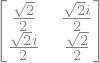

In [4]:
BS = S*H*S
mysim(BS)

that is, the BS is a balanced device which allows the quanton to pass with equal amplitude of probability for the part in $T$ and in $R$.

The combined action of the mirrors (M) is given by

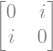

In [5]:
M = pauli(2)*pauli(3)
mysim(M)

The mirrors change the movement of the quanton within the MZI, that is, if the movement is $|0\rangle$, after the action of the mirrors, the movement will be $i|1\rangle$, where $e^{i\frac{\pi}{2}} =i$ is a phase that occurs in the reflections of the quanton. The mirrors change the movement of the A inside the MZI, that is, if the movement is $|0\rangle$, after the action of the mirrors, the movement will be $i|1\rangle$, where $exp{i\frac{\pi}{2}} =i$ is a phase that occurs in the reflections of the A. For $|1\rangle$, after the action of the mirrors we will have $i|0\rangle$.

Symbolic definitions for the PS

In [6]:
ph = symbols('phi', real=True)
ph

The PS, on the other hand, is actuated through

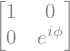

In [7]:
PS = Matrix([[1,0],[0, exp(1j*ph)]])
mysim(PS)

PS is included in more complete MZI descriptions. With it we can modulate different phases for the photons that pass through the upper path from those that pass through the lower path. This assists in different desired tasks after the beams recombine in the second BS. It is worth noting that the $e^{i\phi}$ phase is only included when the quanton move is $|1\rangle$.

## Implementing

The initial state is given by

In [8]:
ψ0 = pbk('0')
mysim(mbk(ψ0))

After the BS we have

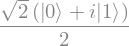

In [9]:
ψ1 = gatep(BS, ψ0, 0)
mysim(mbk(ψ1))

After the combined action of the mirrors, it follows that

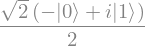

In [10]:
ψ2 = gatep(M, ψ1, 0)
mysim(mbk(ψ2))

PS gives us

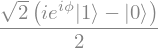

In [11]:
ψ3 = gatep(PS, ψ2, 0)
mysim(mbk(ψ3))

Finally, after the BS, we have

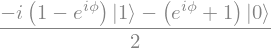

In [12]:
ψ4 = gatep(BS, ψ3, 0)
mysim(mbk(ψ4))

We have included the PS for a more complete description of the MZI that we found in the literature, but without prejudice to our analysis, we will assume that $\phi=0$, so

In [13]:
mysim(mbk(ψ4.subs(ph,0)))

If we calculate, by means of Born's rule, the probability of clicking on D$_0$ (D$_1$) of state $|\psi_4\rangle$, we will get probability 1 of clicking on detector D$_0$ (zero probability for clicking on D$_1$). That is, with this configuration of the MZI it is impossible to have a detection in D$_1$. This finding will be important for the development of the Elitzur-Vaidman bomb. For the configuration of what we are going to do next, let's change the PS for the bomb with peculiar characteristics.

# Elitzur-Vaidman bomb

<img src = 'MZI_bomb.png' width = '50%'>

Before proceeding with the analysis, let's make another definition. The state of the bomb without exploding will be denoted by $|0\rangle$ and if the explosion occurs the state will become $|1\rangle$.

Each of the states is denoted to preserve the order in which the qubits are ordered in the ket. So $|\psi_j^{pb}\rangle$ we have that $j$ is the index of each stage with which the state is evolved, $p$ is the path of the photon and $b$ is relative to bomb's state.

Imagine that we have a bomb with the following mechanism. Using a photon, we can check whether or not the bomb is functional. If the bomb is functional, then the photon finds the bomb and it will detonate. If the bomb is non-functional, then the photon goes through the path normally. For the case where the bomb is non-functional, and therefore the photon passes normally, we fall back on the initial development of this file. That is, we will have photon detection only in D$_0$ (with $\phi=0$).

Let's then develop the case where the bomb is functional. The big idea here is to know if the bomb is functional, but without detonating it. The bomb can be included in the analitical development through a CNOT gate. This can be done as we have two paths within the MZI. If the photon passes through the upper arm, the bomb's state will change from $|0\rangle$ to $|1\rangle$ (in other words, the photon find the bomb), that is, an explosion will occur. If the photon passes through the lower arm, the photon will not reach the bomb and the photon will pass through the BS creating path superposition. Lets start the development again, the initial state is given by

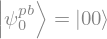

In [14]:
ψ0pb = pbk('00')
x = mbk(ψ0pb)
Eq(Ket('\psi_{0}^{pb}'), x)

After the BS we get

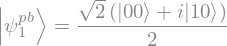

In [15]:
ψ1pb = gatep(BS, ψ0pb, 1)
x = mysim(mbk(ψ1pb))
Eq(Ket('\psi_{1}^{pb}'), x)

Mirrors

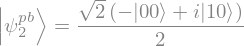

In [16]:
ψ2pb = gatep(M, ψ1pb, 1)
x = mysim(mbk(ψ2pb))
Eq(Ket('\psi_{2}^{pb}'), x)

Now we have the performance of the bomb through CNOT. The control is the path and the target is qubit `0`. If the path is $|1\rangle$, we change the bomb state (upper path). If path is $|0\rangle$, nothing happens (lower paths), therefore

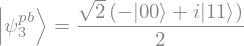

In [17]:
ψ3pb = ctrlp(pauli(1), ψ2pb, [1,1], 0)
x = mysim(mbk(ψ3pb))
Eq(Ket('\psi_{3}^{pb}'), x)

with this we entangle the bomb state with the photon path. Now the performance of the second BS gives us

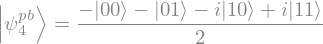

In [18]:
ψ4pb = gatep(BS, ψ3pb, 1)
x = mysim(mbk(ψ4pb))
Eq(Ket('\psi_{4}^{pb}'), x)

Calculating the probabilities of in each of the detectors, with the bomb detonating or not, we will arrive at 1/4 for each situation. Let's analyze the possible situations:
- Case $|00\rangle$: clicking on D$_0$ and the detonation does not occur tells us nothing, because this case also occurs when the bomb is non-functional;
- Cases $|01\rangle$ and $|11\rangle$: they are not expected cases, because there is a bomb detonation;
- Case $|10\rangle$: this is the case of interest. Something happened that doesn't happen when the bomb is non-functional and at the same time it didn't detonate.
In short, we have a 1/4 probability of finding out if the bomb is functional without detonating.

# Elitzur-Vaidman bomb in superposition of inserted and not inserted

<img src = 'MZI_bomb_sup.png' width = '50%'>

In order to expand the use of our codes, we are going to implement an even more comprehensive version that includes the two previous cases in a single experiment. Let's assume that supposedly the bomb is in superposition of being inserted in the MZI path or not. Let's also assume that we can modulate this amount of superposition by means of the free parameters $c_0,c_1$.

Each of the states is denoted to preserve the order in which the qubits are ordered in the ket. So $|\psi_j^{pbI}\rangle$ we have that $j$ is the index of each stage with which the state is evolved, $p$ is the path of the photon, $b$ is relative to bomb and $I$ is relative to whether or not bomb is included in the path.

Let's make an even more comprehensive description. Let's assume that this bomb can be inserted into the path with a certain probability through a state of the type

In [19]:
ψI = psi_c(2)
mbk(ψI)

With $c_0=1$ the bomb is always not inserted ($|0_I\rangle$) and with $c_1=1$ the bomb is always inserted in the path ($|1_I\rangle$). Knowing that $c_0^2 + c_1^2 =1$, for intermediate values we will have overlapping levels between inserted or not inserted. The global system composed of these three subssytems is given by

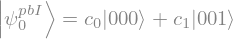

In [20]:
ψ0pbI = comp_sys(pbk('00'), ψI)
x = mbk(ψ0pbI)
Eq(Ket('\psi_{0}^{pbI}'), x)

After the BS we get

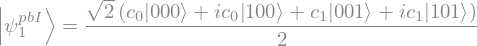

In [21]:
ψ1pbI = gatep(BS, ψ0pbI, 2)
x = mysim(mbk(ψ1pbI))
Eq(Ket('\psi_{1}^{pbI}'), x)

Mirrors

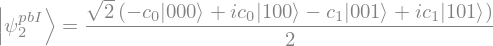

In [22]:
ψ2pbI = gatep(M, ψ1pbI, 2)
x = mysim(mbk(ψ2pbI))
Eq(Ket('\psi_{2}^{pbI}'), x)

Now we need a multicontrolled port, that is, we need to check if the bomb is inserted in the path and also know what the path is. The path activation bit remains 1 and to know if the bomb is inserted we also define it as 1, so we will have a Toffoli gate, which is a CNOT with two controls. Therefore

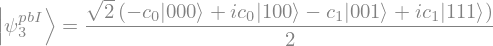

In [23]:
ψ3pbI = ctrlp(pauli(1), ψ2pbI, [(0,1), (2,1)], 1)
x = mysim(mbk(ψ3pbI))
Eq(Ket('\psi_{3}^{pbI}'), x)

with this we have a three-part entangled state. Now the performance of the second BS gives us

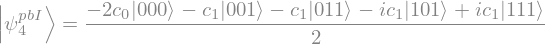

In [24]:
ψ4pbI = gatep(BS, ψ3pbI, 2)
x = mysim(mbk(ψ4pbI))
Eq(Ket('\psi_{4}^{pbI}'), x)

Calculating the probabilities of in each of the detectors, with the bomb detonating or not, and inserted or not in the path, we will arrive in several situations. The only case of interest for the purpose of the experiment is when we have the state $|101\rangle$ in order from left to right: it passed through the vertical where the bomb is inserted ($|1_p\rangle$), it was not detonated ($|0_b\rangle$) and it is inserted in the path ($|1_I\rangle$). By Born's rule, the probability of this happening is $c_1^2/4$. Graphically, we have

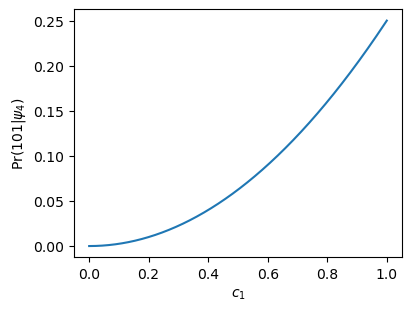

In [33]:
import matplotlib.pyplot as plt

c_1 = np.linspace(0, 1, 1000)
c_0 = np.sqrt(1-c_1**2)
prob101 = c_1**2/4
#prob000 = c_0**2

plt.figure(figsize = (4,3), constrained_layout = True)
plt.plot(c_1, prob101)
#plt.plot(c_1, prob000)
plt.xlabel(r'$c_1$')
plt.ylabel(r'$\Pr(101|\psi_4)$')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.title('Gráfico da função')
plt.show()

Note that from $|\psi_4\rangle$ we could not have the state $|_{0}^{1}10\rangle$, because it would mean that the bomb exploded, but it wasn't even inserted in the path. The state $|100\rangle$ is also not possible, since if the bomb is not inserted in the path there is detection in D$_1$. We also have situation $|001\rangle$ but, even though the bomb is inserted in the path, there is the possibility that the bomb is not functional, i.e. falling back to the case where we have detection in D$_0$ and it does not help us to know if the bomb is funcional or not (only the detection in D$_1$ guarantees that it is functional). Another point is the probability that $|000\rangle$ occurs. This is due to the fact that in this approach there is a situation where in fact the bomb will not be included in the path and all the possibilities of click are on D$_0$.